In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
from time import time

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28*28).astype('float32')

In [5]:
X_train = X_train/255.0
X_test = X_test/255.0

In [6]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [7]:
model = keras.Sequential()
model.add(keras.layers.Dense(784, input_dim=28*28, activation='relu'))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(10, activation='sigmoid'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## LR Finder

In [9]:
from clr_callback import LRFinder

epoch_size - Number of observations in the entire training set

In [10]:
epoch_size = 60000
batch_size = 32

In [11]:
lr_finder = LRFinder(min_lr=1e-5, 
                     max_lr=1e-2, 
                     steps_per_epoch=np.ceil(epoch_size/batch_size), 
                     epochs=3)

In [12]:
model.fit(X_train, y_train, callbacks=[lr_finder])

Train on 60000 samples
60000/60000 [==============================] - 17s 282us/sample - loss: 0.3582 - accuracy: 0.8938


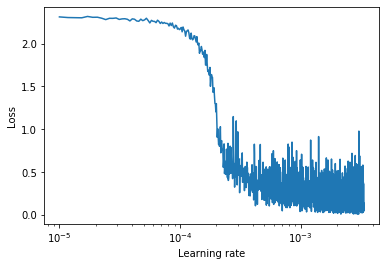

In [13]:
lr_finder.plot_loss()

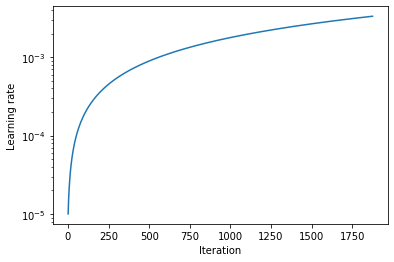

In [14]:
lr_finder.plot_lr()

## CyclicLR

In [15]:
from clr_callback import CyclicLR

In [16]:
clr = CyclicLR(base_lr=5e-5, max_lr=5e-4)

In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=[clr], epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0867 - accuracy: 0.9749 - val_loss: 0.0814 - val_accuracy: 0.9738
Epoch 2/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.0538 - accuracy: 0.9837 - val_loss: 0.0602 - val_accuracy: 0.9815
Epoch 3/5
60000/60000 [==============================] - 15s 246us/sample - loss: 0.0328 - accuracy: 0.9902 - val_loss: 0.0721 - val_accuracy: 0.9789
Epoch 4/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0328 - accuracy: 0.9898 - val_loss: 0.0586 - val_accuracy: 0.9839
Epoch 5/5
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0148 - accuracy: 0.9957 - val_loss: 0.0793 - val_accuracy: 0.9795
